# Getting data from kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:49<00:00, 22.9MB/s]


### unzip data

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### importing libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout

### We use generators bcz it divides our data into batches <br>It's very usefull for large amount of data to reduce time complexities

In [5]:
# keras generator function
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',#assign cat=0, dog=1
    batch_size = 32,
    image_size = (256,256),

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',#assign cat=0, dog=1
    batch_size = 32,
    image_size = (256,256),

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize the data between 0-1 range
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [7]:
# Creating CNN model
# 1 layer - 32 filter
# 2 layer - 64 filter
# 3 layer - 128 filter

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 102ms/step - loss: 6.1698 - accuracy: 0.6020 - val_loss: 2.0046 - val_accuracy: 0.6558
Epoch 2/10
625/625 [==============================] - 64s 103ms/step - loss: 1.8488 - accuracy: 0.6937 - val_loss: 1.5519 - val_accuracy: 0.7168
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 1.3755 - accuracy: 0.7294 - val_loss: 1.2648 - val_accuracy: 0.7248
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 1.1645 - accuracy: 0.7613 - val_loss: 1.1524 - val_accuracy: 0.7182
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 1.0065 - accuracy: 0.7856 - val_loss: 0.8806 - val_accuracy: 0.8086
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 1.1344 - accuracy: 0.8032 - val_loss: 1.7154 - val_accuracy: 0.6482
Epoch 7/10
625/625 [==============================] - 68s 107ms/step - loss: 1.2805 - accuracy: 0.8188 - val_loss: 1.3507 - val_ac

### Accuracy before applying Batch and Dropout

In [11]:
import matplotlib.pyplot as plt

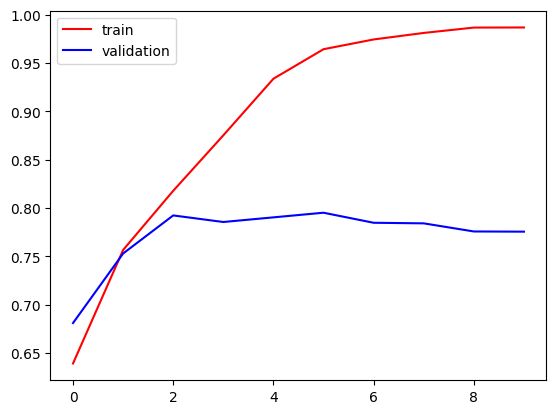

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

### Accuracy after applying Batch and Dropout

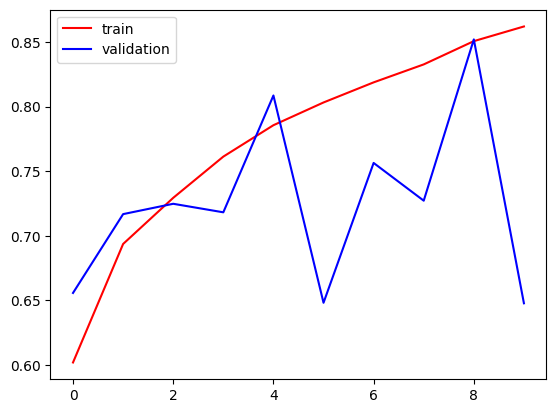

In [12]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

### Accuracy after applying L2 Regularization

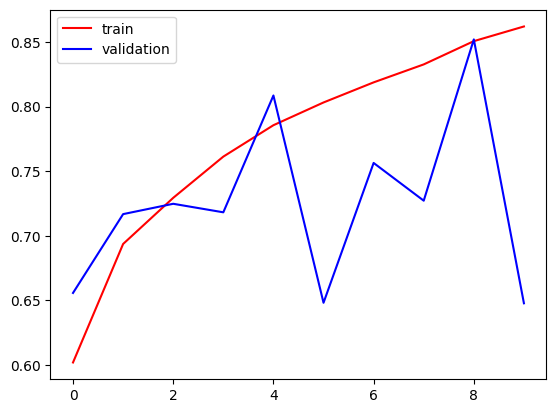

In [13]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

### Loss before applying Batch and Dropout

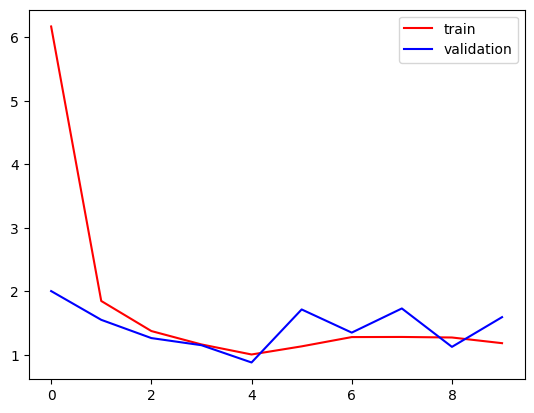

In [14]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

### Loss after applying Batch and Dropout

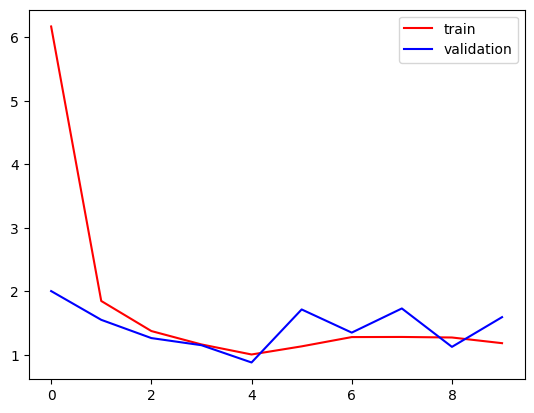

In [15]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

### Loss after applying L2 Regularization

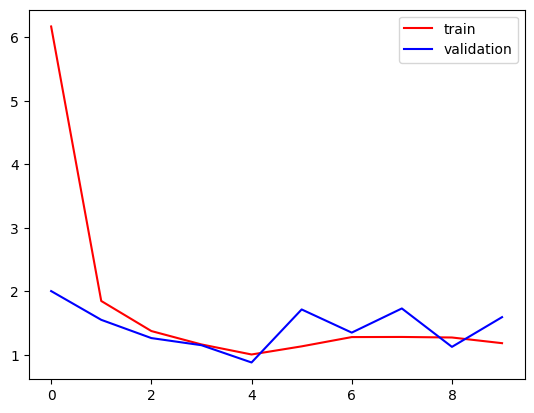

In [16]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

### Above you can see overfitting is happening<br>

### Ways to reduce overfitting
#### 1] Add more data
#### 2] Data augmentation
#### 3] L1 / L2 regularizer
#### 4] Dropout
#### 5] Batch norm
#### 6] Reduce complexity




In [17]:
import cv2 as cv

In [18]:
test_img1 = cv.imread('/content/dog.jpg')

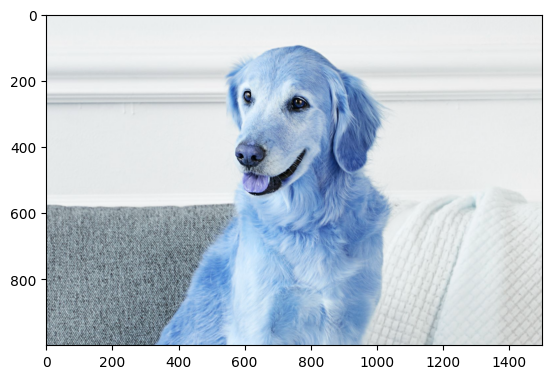

In [19]:
plt.imshow(test_img1)

In [20]:
test_img1.shape

(1000, 1500, 3)

In [21]:
test_img1 = cv.resize(test_img1, (256,256))

In [22]:
test_input1 = test_img1.reshape((1,256,256,3))

In [23]:
model.predict(test_input1)

1/1 [==============================] - 1s 540ms/step


array([[1.]], dtype=float32)

In [24]:
test_img2 = cv.imread('/content/cat.jpg')

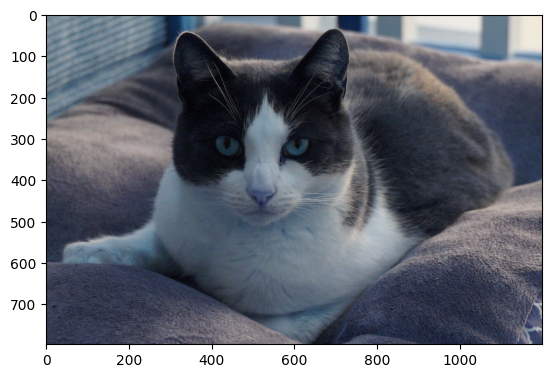

In [25]:
plt.imshow(test_img2)

In [26]:
test_img2 = cv.resize(test_img2, (256,256))

In [27]:
# converting to batch
test_input2 = test_img2.reshape((1,256,256,3))

In [28]:
model.predict(test_input2)

1/1 [==============================] - 0s 17ms/step


array([[0.96053326]], dtype=float32)

In [29]:
# 0 - cat
# 1 - Dog